# Template Translation Detection of Egyptian Articles 

## Supervised Classification Algorithms:

### Random Forest:

In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

df = pd.read_csv("../../Experimental-Setups/arzwiki-20240101-all-20k.csv")
df

,page_title,total_edits,total_editors,total_bytes,total_chars,total_words,page_text,page_text_cleaned,label
0,كريستينا نوير,27,6,1685,460,65,كريستينا نوير christina noir يوليه ممثلة بورنو...,كريستينا نوير يوليه ممثلة بورنوجرافية امريكية ...,human-generated
1,ارنست هيفليجر,2,2,1060,381,67,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,template-translated
2,ناديه مصطفى,19,8,1841,637,113,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,human-generated
3,جامعات عمان,10,6,1810,767,113,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,human-generated
4,الحرب السكندريه,51,16,12077,6192,1083,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,human-generated
...,...,...,...,...,...,...,...,...,...
19995,عبد الخالق صالح,12,5,1070,467,81,عبدالخالق صالح abdelkhalek saleh ممثل مصرى من ...,عبدالخالق صالح ممثل مصرى من مواليد تخرج فى كلي...,human-generated
19996,چيم رونى,4,2,916,301,53,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,template-translated
19997,البطوله الوطنيه الاولى 1963,2,2,872,315,51,البطوله الوطنيه الاولى országos bajnokság هوا ...,البطوله الوطنيه الاولى هوا موسم رياضى فى كورة ...,template-translated
19998,دايان لين,13,7,1157,350,59,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,human-generated


#### Input Features:

In [2]:
import json
import numpy as np
import pandas as pd

def fetch_embeddings(page_text, dataframe_name, embeddings_file):
    idx = np.where(dataframe_name["page_text_cleaned"] == page_text)[0][0]
    page_title = dataframe_name['page_title'][idx]
    return embeddings_file[page_title]
    
embeddings_files = ["../../Experimental-Setups/arzwiki-20240101-all-20k-sparknlp-embeddings.json", 
                   "../../Experimental-Setups/arzwiki-20240101-all-20k-camelbert-embeddings.json"]

for file in embeddings_files:
    with open(file) as json_file:
        fetched_page_text_embeddings = json.load(json_file)
        df[f'{file.split("/")[-1].split("-")[-2]}_page_text_embeddings'] = df['page_text_cleaned'].apply(lambda page_text: fetch_embeddings(page_text, df, fetched_page_text_embeddings))

df['label'] = df['label'].map({'template-translated': 1, 'human-generated': 0})

df

,page_title,total_edits,total_editors,total_bytes,total_chars,total_words,page_text,page_text_cleaned,label,sparknlp_page_text_embeddings,camelbert_page_text_embeddings
0,كريستينا نوير,27,6,1685,460,65,كريستينا نوير christina noir يوليه ممثلة بورنو...,كريستينا نوير يوليه ممثلة بورنوجرافية امريكية ...,0,"[-0.01276949152542373, 0.00048644067796609894,...","[0.9345402717590332, -0.23156806826591492, 1.0..."
1,ارنست هيفليجر,2,2,1060,381,67,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,1,"[-0.0033208955223880602, -0.04084029850746269,...","[1.1935014724731445, -0.4615197479724884, 0.74..."
2,ناديه مصطفى,19,8,1841,637,113,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,0,"[0.004411607142857147, -0.025443750000000008, ...","[1.0213305950164795, -0.9650395512580872, 0.87..."
3,جامعات عمان,10,6,1810,767,113,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,0,"[0.0031707964601769916, -0.0018451327433628292...","[0.8735443353652954, -1.340850591659546, 0.825..."
4,الحرب السكندريه,51,16,12077,6192,1083,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,0,"[0.014313826679649486, -0.013468354430379716, ...","[1.1119786500930786, -0.9848897457122803, 0.63..."
...,...,...,...,...,...,...,...,...,...,...,...
19995,عبد الخالق صالح,12,5,1070,467,81,عبدالخالق صالح abdelkhalek saleh ممثل مصرى من ...,عبدالخالق صالح ممثل مصرى من مواليد تخرج فى كلي...,0,"[0.0005721518987341762, -0.0007936708860759519...","[0.8878637552261353, -0.8799211382865906, 0.71..."
19996,چيم رونى,4,2,916,301,53,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,1,"[-0.02443921568627451, -0.016590196078431377, ...","[0.9044078588485718, -0.4501630961894989, 0.39..."
19997,البطوله الوطنيه الاولى 1963,2,2,872,315,51,البطوله الوطنيه الاولى országos bajnokság هوا ...,البطوله الوطنيه الاولى هوا موسم رياضى فى كورة ...,1,"[-0.01403829787234042, -0.03250425531914894, 0...","[1.0202338695526123, -0.8164071440696716, 0.46..."
19998,دايان لين,13,7,1157,350,59,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,0,"[-0.026108620689655172, -0.008184482758620692,...","[0.8501976728439331, -0.6579734086990356, 0.60..."


#### Ablations:

In [3]:
import pandas as pd

def prepare_meta_features(df, features):
    if features == "metadata1":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])    # 1
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata2":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_editors'][i])  # 2
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata3":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_bytes'][i])    # 3
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata4":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_chars'][i])    # 4
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata5":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_words'][i])    # 5
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata1+2":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])    # 1
            x.append(df['total_editors'][i])  # 2
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata3+4+5":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_bytes'][i])    # 3
            x.append(df['total_chars'][i])    # 4
            x.append(df['total_words'][i])    # 5
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata_all":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])    # 1
            x.append(df['total_editors'][i])  # 2
            x.append(df['total_bytes'][i])    # 3
            x.append(df['total_chars'][i])    # 4
            x.append(df['total_words'][i])    # 5
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    else: 
        print("Error: Choose Features: Metadata 1 to 5, Metadata 1+2, Metadata 3+4+5, Metadata All")
        pass

##### FEATURE=METADATA1 #####

Training Accuracy: 100.00 (+/- 0.00) %
Testing Accuracy: 100.00 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



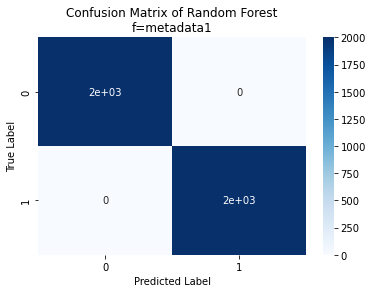

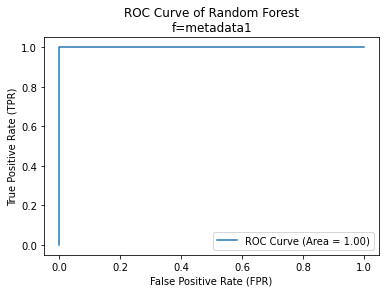



##### FEATURE=METADATA2 #####

Training Accuracy: 100.00 (+/- 0.00) %
Testing Accuracy: 100.00 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



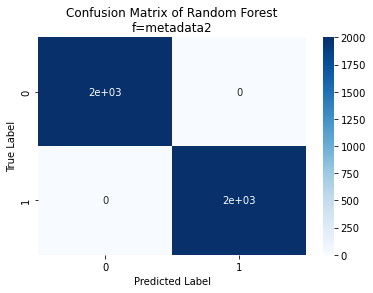

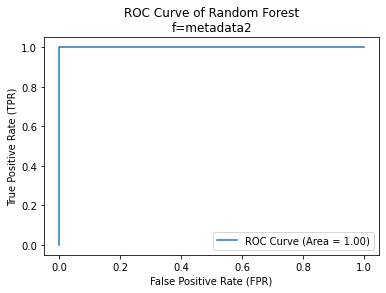



##### FEATURE=METADATA3 #####

Training Accuracy: 86.21 (+/- 0.01) %
Testing Accuracy: 85.17 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      2000
           1       0.83      0.88      0.86      2000

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000
 



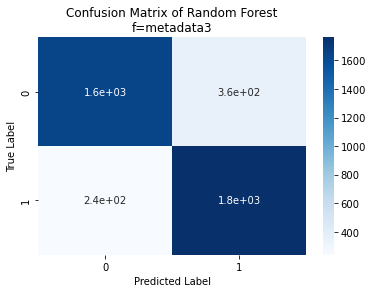

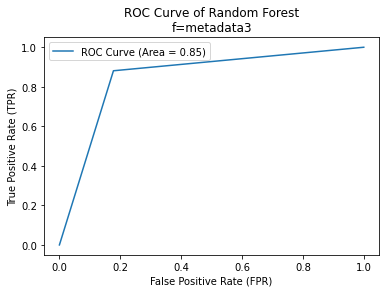



##### FEATURE=METADATA4 #####

Training Accuracy: 83.19 (+/- 0.01) %
Testing Accuracy: 82.23 (+/- 0.99) %

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      2000
           1       0.79      0.88      0.83      2000

    accuracy                           0.82      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.83      0.82      0.82      4000
 



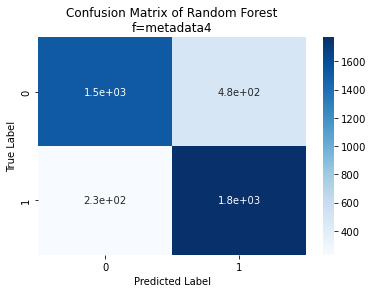

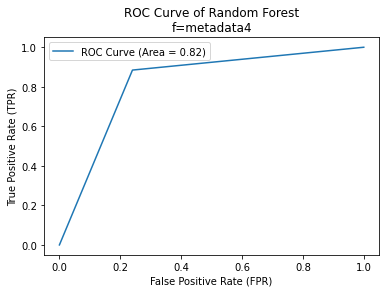



##### FEATURE=METADATA5 #####

Training Accuracy: 84.39 (+/- 0.01) %
Testing Accuracy: 84.80 (+/- 0.99) %

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      2000
           1       0.81      0.91      0.86      2000

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000
 



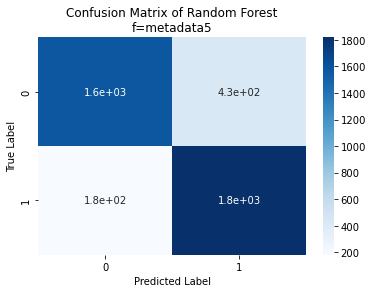

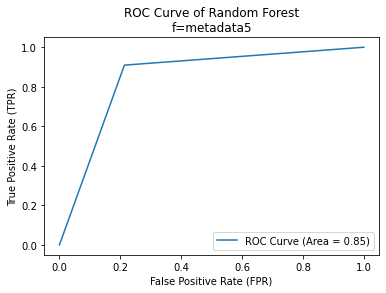



##### FEATURE=METADATA1+2 #####

Training Accuracy: 100.00 (+/- 0.00) %
Testing Accuracy: 100.00 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



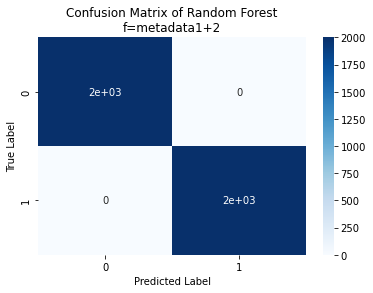

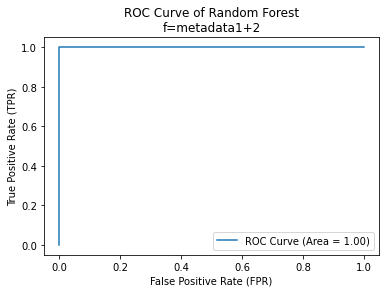



##### FEATURE=METADATA3+4+5 #####

Training Accuracy: 91.66 (+/- 0.01) %
Testing Accuracy: 91.25 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2000
           1       0.90      0.93      0.91      2000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000
 



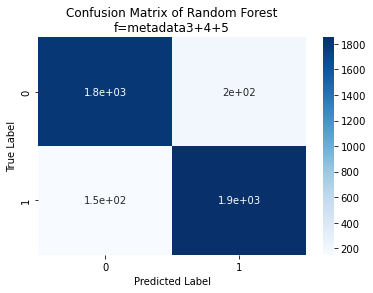

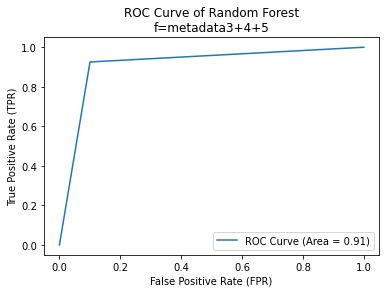



##### FEATURE=METADATA_ALL #####

Training Accuracy: 100.00 (+/- 0.00) %
Testing Accuracy: 100.00 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



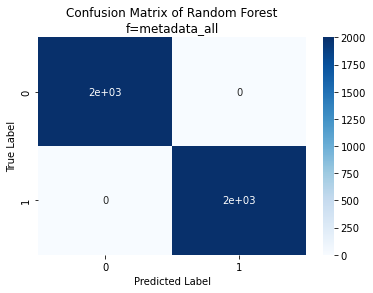

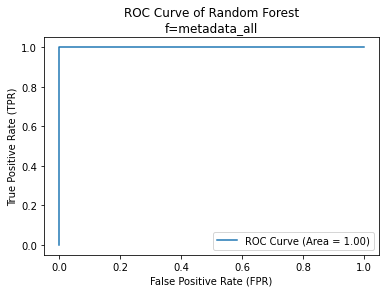

In [4]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

features = ["metadata1", "metadata2", "metadata3", "metadata4", "metadata5", "metadata1+2", "metadata3+4+5", "metadata_all"]

for feature in features:

    print(f"##### FEATURE={feature.upper()} #####\n")
    X, y = prepare_meta_features(df, features=feature)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y, shuffle=True, random_state=2024)
    
    random_forest_classifier = RandomForestClassifier()
    
    y_trained = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (y_trained.mean()*100, y_trained.std() * 2), "%")
    
    y_predicted = cross_val_predict(random_forest_classifier, X_test, y_test, cv=5)
    print("Testing Accuracy: %0.2f (+/- %0.2f)" %  (metrics.accuracy_score(y_test, y_predicted)*100, y_predicted.std() * 2), "%")
    
    print("\nClassification Report:\n", classification_report(y_test, y_predicted), "\n")
    
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix of Random Forest\nf={feature}')
    plt.savefig(f"plots/rf_cm_{feature}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
    plt.show()
    
    print("\n")
    
    random_forest_classifier.fit(X_train, y_train)
    random_forest_classifier.predict_proba(X_test)[:, 1]
    
    false_positive, true_positive, thresholds = roc_curve(y_test, y_predicted)
    auc_roc = auc(false_positive, true_positive)
    
    fig, ax = plt.subplots()
    ax.plot(false_positive, true_positive, label='ROC Curve (Area = %0.2f)' % auc_roc)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(f'ROC Curve of Random Forest\nf={feature}')
    plt.savefig(f"plots/rf_roc_{feature}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
    ax.legend()
    plt.show()

    print("\n")

#### Results:

In [5]:
import numpy as np
import pandas as pd

def prepare_features(df, features, model=None):
    if features == "metadata":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])
            x.append(df['total_editors'][i])
            x.append(df['total_bytes'][i])
            x.append(df['total_chars'][i])
            x.append(df['total_words'][i])
            X.append(x) # Only page_metadata
        y = df['label'].to_list()
        return X, y

    elif features == "embeddings":
        if model == "sparknlp":
            X = []
            for i in range(df.shape[0]):
                x = []
                X.append(df['sparknlp_page_text_embeddings'].to_list()[i]) # Only page_text_embeddings
            y = df['label'].to_list()
            return X, y
        
        elif model == "camelbert":
            X = []
            for i in range(df.shape[0]):
                x = []
                X.append(df['camelbert_page_text_embeddings'].to_list()[i]) # Only page_text_embeddings
            y = df['label'].to_list()
            return X, y
        
        else: 
            print("Error: Choose An Embedding Model: SparkNLP or CAMeLBERT")
            pass
            
    elif features == "metadata+embeddings":
        if model == "sparknlp":
            X = []
            for i in range(df.shape[0]):
                x = []
                x.append(df['total_edits'][i])
                x.append(df['total_editors'][i])
                x.append(df['total_bytes'][i])
                x.append(df['total_chars'][i])
                x.append(df['total_words'][i])
                X.append(np.hstack([x, df['sparknlp_page_text_embeddings'].to_list()[i]])) # Both page_metadata + page_text_embeddings
            y = df['label'].to_list()
            return X, y
        
        elif model == "camelbert":
            X = []
            for i in range(df.shape[0]):
                x = []
                x.append(df['total_edits'][i])
                x.append(df['total_editors'][i])
                x.append(df['total_bytes'][i])
                x.append(df['total_chars'][i])
                x.append(df['total_words'][i])
                X.append(np.hstack([x, df['camelbert_page_text_embeddings'].to_list()[i]])) # Both page_metadata + page_text_embeddings
            y = df['label'].to_list()
            return X, y
  
    else: 
        print("Error: Choose Features: Metadata, Embeddings, or Metadata+Embeddings")
        pass

##### FEATURE=METADATA, MODEL=NONE #####

Training Accuracy: 100.00 (+/- 0.00) %
Testing Accuracy: 100.00 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



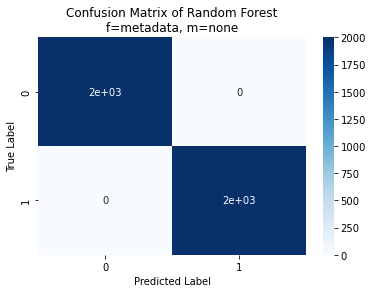

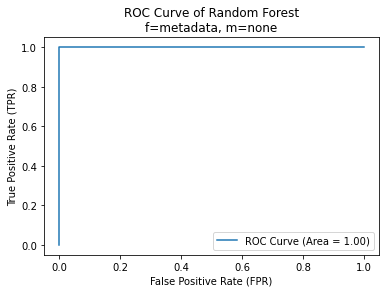



##### FEATURE=EMBEDDINGS, MODEL=SPARKNLP #####

Training Accuracy: 98.64 (+/- 0.00) %
Testing Accuracy: 98.08 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2000
           1       0.98      0.98      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000
 



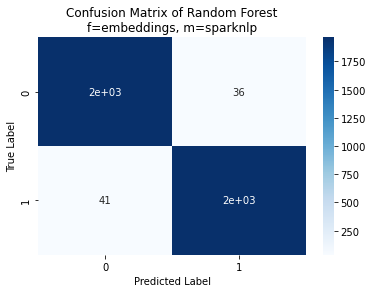

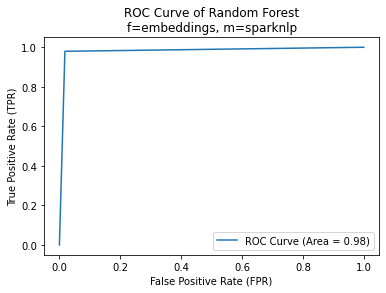



##### FEATURE=EMBEDDINGS, MODEL=CAMELBERT #####

Training Accuracy: 98.39 (+/- 0.00) %
Testing Accuracy: 98.17 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2000
           1       0.98      0.99      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000
 



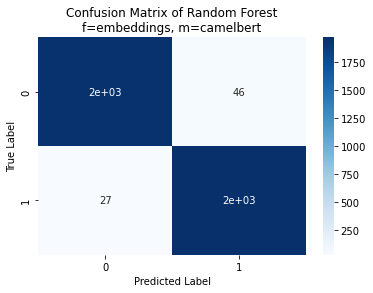

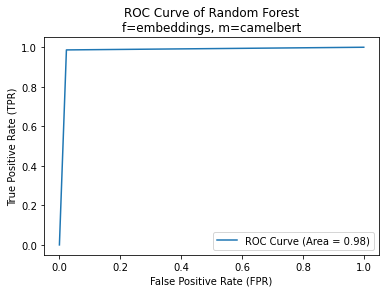



##### FEATURE=METADATA+EMBEDDINGS, MODEL=SPARKNLP #####

Training Accuracy: 100.00 (+/- 0.00) %
Testing Accuracy: 100.00 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



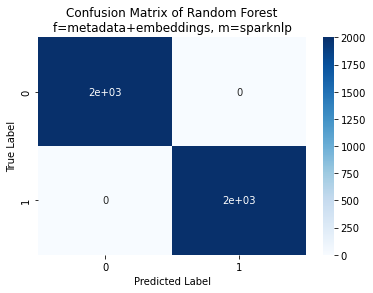

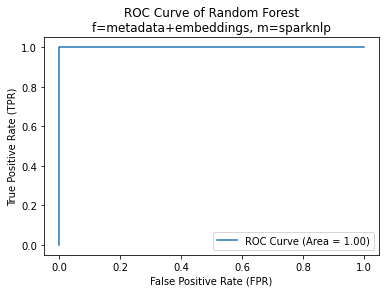



##### FEATURE=METADATA+EMBEDDINGS, MODEL=CAMELBERT #####

Training Accuracy: 99.99 (+/- 0.00) %
Testing Accuracy: 99.95 (+/- 1.00) %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
 



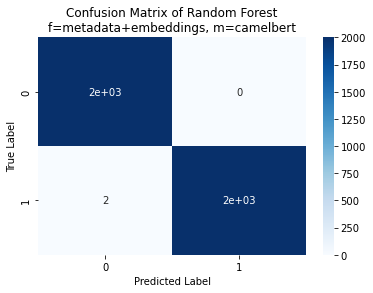

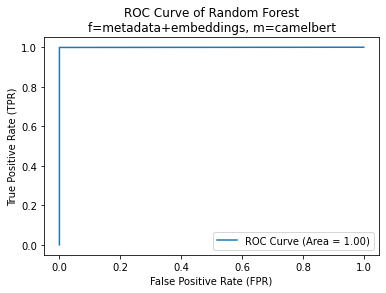

In [6]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

feature, model = "metadata", "none"

print(f"##### FEATURE={feature.upper()}, MODEL={model.upper()} #####\n")

X, y = prepare_features(df, features=feature, model=model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y, shuffle=True, random_state=2024)

random_forest_classifier = RandomForestClassifier()

y_trained = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)
print("Training Accuracy: %0.2f (+/- %0.2f)" % (y_trained.mean()*100, y_trained.std() * 2), "%")

y_predicted = cross_val_predict(random_forest_classifier, X_test, y_test, cv=5)
print("Testing Accuracy: %0.2f (+/- %0.2f)" %  (metrics.accuracy_score(y_test, y_predicted)*100, y_predicted.std() * 2), "%")

print("\nClassification Report:\n", classification_report(y_test, y_predicted), "\n")

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix of Random Forest\nf={feature}, m={model}')
plt.savefig(f"plots/rf_cm_{feature}_{model}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
plt.show()

print("\n")

random_forest_classifier.fit(X_train, y_train)
random_forest_classifier.predict_proba(X_test)[:, 1]

false_positive, true_positive, thresholds = roc_curve(y_test, y_predicted)
auc_roc = auc(false_positive, true_positive)

fig, ax = plt.subplots()
ax.plot(false_positive, true_positive, label='ROC Curve (Area = %0.2f)' % auc_roc)
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title(f'ROC Curve of Random Forest\nf={feature}, m={model}')
plt.savefig(f"plots/rf_roc_{feature}_{model}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
ax.legend()
plt.show()

print("\n")

features = ["embeddings", "metadata+embeddings"]
models = ["sparknlp", "camelbert"]

for feature in features:

    for model in models:

        print(f"##### FEATURE={feature.upper()}, MODEL={model.upper()} #####\n")
        X, y = prepare_features(df, features=feature, model=model)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y, shuffle=True, random_state=2024)
        
        random_forest_classifier = RandomForestClassifier()
        
        y_trained = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)
        print("Training Accuracy: %0.2f (+/- %0.2f)" % (y_trained.mean()*100, y_trained.std() * 2), "%")
        
        y_predicted = cross_val_predict(random_forest_classifier, X_test, y_test, cv=5)
        print("Testing Accuracy: %0.2f (+/- %0.2f)" %  (metrics.accuracy_score(y_test, y_predicted)*100, y_predicted.std() * 2), "%")
        
        print("\nClassification Report:\n", classification_report(y_test, y_predicted), "\n")
        
        cm = confusion_matrix(y_test, y_predicted)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix of Random Forest\nf={feature}, m={model}')
        plt.savefig(f"plots/rf_cm_{feature}_{model}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
        plt.show()
        
        print("\n")
        
        random_forest_classifier.fit(X_train, y_train)
        random_forest_classifier.predict_proba(X_test)[:, 1]
        
        false_positive, true_positive, thresholds = roc_curve(y_test, y_predicted)
        auc_roc = auc(false_positive, true_positive)
        
        fig, ax = plt.subplots()
        ax.plot(false_positive, true_positive, label='ROC Curve (Area = %0.2f)' % auc_roc)
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.set_title(f'ROC Curve of Random Forest\nf={feature}, m={model}')
        plt.savefig(f"plots/rf_roc_{feature}_{model}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
        ax.legend()
        plt.show()

        print("\n")